<a href="https://colab.research.google.com/github/KonstantinElfimow/modeling_random_variables/blob/main/notepad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
bins = 50 # количетсво интервалов разбиений на гистограмме
g = 10000 # количество генерируемых значений случайной величины

In [ ]:
# Функция распределения
def theoretical_distribution(x: float, a: float, b: float) -> float:
    if x < a:
        return 0
    elif x > b:
        return 1
    else:
        integral, _ = quad(lambda t: 1/(b-a), a, x)
        return integral

In [ ]:
n = 10

In [ ]:
a = 0
b = 1
sample = np.array([a + b * np.random.random() for _ in range(g)])

Строим эмпирическое и теоретическое распределения

In [ ]:
# Вычисление эмпирической функции распределения
x = np.sort(sample)
y = np.arange(1, len(sample) + 1) / len(sample)

In [ ]:
# Вычисление теоретической функции распределения
a, b = 0, 1
x_theor = np.linspace(a, b, 100)
y_theor = [theoretical_distribution(xi, a, b) for xi in x_theor]

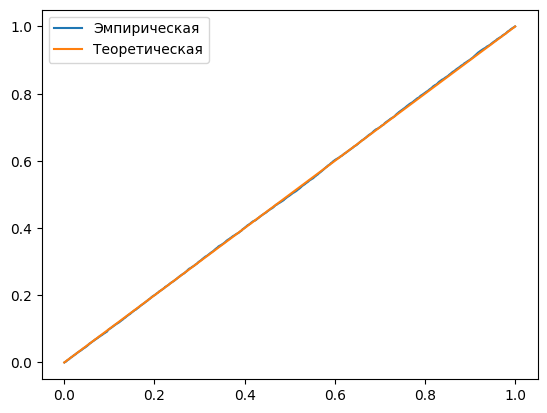

In [ ]:
# Построение графиков
plt.plot(x, y, label='Эмпирическая')
plt.plot(x_theor, y_theor, label='Теоретическая')
plt.legend()

In [ ]:
# Вычисление средней абсолютной разности эмпирической и теоретической функций распределения
n_trials = np.arange(10, 10000, 10)
abs_diffs = []
for n in n_trials:
    sample = np.random.uniform(size=n)
    x = np.sort(sample)
    y_emp = np.arange(1, len(sample)+1) / len(sample)
    y_theor = [theoretical_distribution(xi, a, b) for xi in x]
    abs_diff = np.mean(np.abs(y_emp - y_theor))
    abs_diffs.append(abs_diff)

Text(0, 0.5, 'Средняя абсолютная разность')

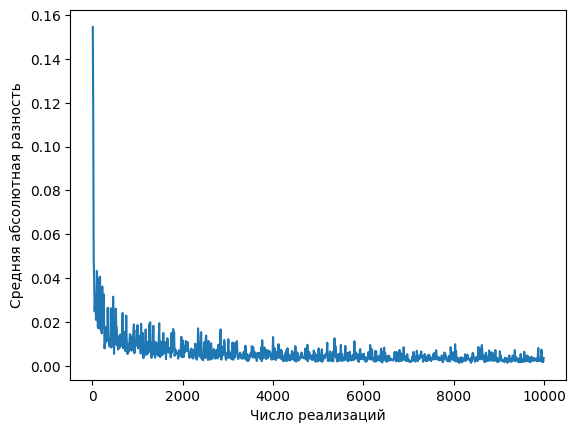

In [ ]:
# Построение графика зависимости средней абсолютной разности от числа реализаций случайной величины
plt.plot(n_trials, abs_diffs)
plt.xlabel('Число реализаций')
plt.ylabel('Средняя абсолютная разность')